# Data Exploration - Temperature Per Country
---

In [1]:
%%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  datetime import datetime as dt
plt.style.use('fivethirtyeight')
%matplotlib inline

CPU times: user 1.04 s, sys: 174 ms, total: 1.21 s
Wall time: 1.22 s


In [2]:
df_temp = pd.read_csv ('../data/temperatures/GlobalLandTemperaturesByCountry.csv', parse_dates = ['dt'])

---
### A Random Slice of the Original Dataset
---

In [3]:
df_temp.sample (5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
453971,1987-08-01,22.796,0.308,San Marino
187700,1833-01-01 00:00:00,NaN,NaN,French Guiana
479784,1918-12-01,26.875,1.230,Solomon Islands
564002,1962-08-01,25.021,0.367,Venezuela
246512,1842-01-01 00:00:00,NaN,NaN,Indonesia


In [4]:
print '[INFO] %20s: ' % ('Before Shape'), df_temp.shape
df_tempC = df_temp.dropna ()
print '[INFO] %20s: ' % ('After Shape'), df_tempC.shape

[INFO]         Before Shape:  (577462, 4)
[INFO]          After Shape:  (544811, 4)


---
### Rename columns
---
I am ranaming the remaining columns in the dataframe to simpler names for easier reference later on.

In [5]:
df_temp = df_tempC.rename (index = str, columns = {'AverageTemperature': 'avgTemp', 'AverageTemperatureUncertainty': 'uncertainty'})
df_temp.sample (5)

,dt,avgTemp,uncertainty,Country
230896,1915-03-01,25.313,0.724,Haiti
141781,1954-06-01,15.031,0.358,Denmark (Europe)
235042,2006-04-01,27.070,0.366,Honduras
31154,1906-02-01,25.966,0.322,Aruba
246081,1994-11-01,21.033,0.279,India


---
### Feature Engineering - Extract 'Year' of each sample
---
I want to extract a single represetative value of Earth's land temperature reading for each year in the dataframe. To achieve that, here I extract the 'year' from each temperature reading as the first step.

In [6]:
# Extract year from each reading
df_temp ['year'] = pd.DatetimeIndex (df_temp ['dt']).year
df_temp = df_temp.drop (['dt'], axis = 1)
df_temp.tail ()

,avgTemp,uncertainty,Country,year
577456,21.142,0.495,Zimbabwe,2013
577457,19.059,1.022,Zimbabwe,2013
577458,17.613,0.473,Zimbabwe,2013
577459,17.000,0.453,Zimbabwe,2013
577460,19.759,0.717,Zimbabwe,2013


---
## Cleanup - Keep Post - 1900 Data
---

In [7]:
df_tempPost1900 = df_temp [df_temp.year > 1899]
df_tempPost1900.head ()

,avgTemp,uncertainty,Country,year
1874,-3.026,0.538,Åland,1900
1875,-8.063,0.657,Åland,1900
1876,-3.196,0.467,Åland,1900
1877,0.781,0.224,Åland,1900
1878,4.960,0.503,Åland,1900


In [8]:
df_tempPost1900 = df_tempPost1900.drop (['uncertainty'], axis = 1)
df_tempPost1900.sample (5)

,avgTemp,Country,year
319349,25.733,Madagascar,2009
373673,14.903,New Zealand,1957
193133,24.431,Gabon,1925
569066,25.214,Virgin Islands,2006
113895,26.063,Christmas Island,1944


---
## Faceting - Create Avg. Temp Dataframe Per Country
---

In [9]:
dfPerCountry = {}
countries = df_tempPost1900 ['Country'].unique ()

for country in countries:
    dfPerCountry [country] = df_tempPost1900 [df_tempPost1900 ['Country'] == country]

# print dfPerCountry

---
## Faceting - Calculate Avg. Temp / Year / Country
---

In [10]:
aggDfPerCntry = {}
for country in countries:
    aggDfPerCntry [country] = dfPerCountry [country].groupby ('year')[['avgTemp']].mean ()
    aggDfPerCntry [country] = aggDfPerCntry [country].sort_index ()
    aggDfPerCntry [country] = aggDfPerCntry [country].rename (index = str, columns = {'avgTemp': country})

# print aggDfPerCntry

---
## Transform - Merge Per Country Dataframes to Get Global Dataframe / Year / Country
---

In [11]:
df_tempPerCountry = aggDfPerCntry [countries [0]]
for country in countries [1:]:
    df_tempPerCountry = pd.merge (df_tempPerCountry, aggDfPerCntry [country], left_index = True, right_index = True)
    # print '[INFO] Merged %-56s | Resulting Shape of Global DF:' % country, df_tempPerCountry.shape

---
## Merged DataFrame
---

In [12]:
df_tempPerCountry.sample (5)

,Åland,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,...,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1976,4.832917,13.708583,23.911917,12.036250,22.356750,26.721083,11.304500,21.447417,26.454500,26.267667,...,8.651250,16.900333,11.785333,25.023250,23.625833,26.151833,21.597833,25.949000,20.826250,20.691000
1980,5.015667,14.887333,24.446667,12.162083,23.160167,26.990750,10.772500,22.077583,27.252083,27.118417,...,9.135500,18.056417,13.026750,25.573083,24.172167,26.990000,22.925667,26.855583,21.337667,21.128833
1983,6.134083,14.614833,24.579417,12.510917,23.683000,26.928667,11.991750,22.367250,27.263667,27.079250,...,8.912333,17.404667,14.087000,25.783583,23.945083,26.958167,23.380833,26.244500,22.346083,22.367167
2007,7.029000,15.106167,24.851500,13.890500,24.065333,27.452417,12.155250,22.427083,27.685083,27.509083,...,9.837500,17.516167,13.928333,25.854083,24.302167,27.470000,23.145417,27.310750,21.838500,21.604250
1957,5.594583,12.777167,24.082417,13.078417,22.620250,26.762917,11.144083,21.991500,26.887167,26.677750,...,9.126333,17.376250,11.721083,25.306500,24.048917,26.626583,21.943667,25.953417,21.658083,21.821250


---
## Next Step
---
  - Add column for average global temperature for each year in the final dataframe above
  - Identify the countries whose temperature change most strongly correlates with the global temperature change
---

In [13]:
df_gTemp = pd.read_csv ('../data/firstPass/GlobalTemperatures.csv', parse_dates = ['dt'])
df_gTemp = df_gTemp.drop (['LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandMaxTemperature', 'LandMaxTemperatureUncertainty', 'LandAverageTemperatureUncertainty'], axis = 1)
df_gTemp = df_gTemp.rename (index = str, columns = {'LandAverageTemperature': 'Global'})
df_gTemp ['year'] = pd.DatetimeIndex (df_gTemp ['dt']).year
df_gTemp = df_gTemp.drop (['dt'], axis = 1)
df_gAggTemp = df_gTemp.groupby ('year')[['Global']].mean ()
df_gAggTempPost1948 = df_gAggTemp [df_gAggTemp.index > 1947]
df_gAggTempFinal = df_gAggTempPost1948 [df_gAggTempPost1948.index < 2014]
df_gAggTempFinal.index = df_gAggTempFinal.index.map (unicode)

# Add global avg. temperature to per-country dataframe
df_final = df_tempPerCountry.join (df_gAggTempFinal, how = 'inner')

In [14]:
df_final.head ()

,Åland,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Global
year,,,,,,,,,,,,,,,,,,,,,
1948,6.045500,14.335250,24.007833,12.753917,23.071333,26.680417,11.935583,21.896333,26.847333,26.607250,...,17.168250,12.822250,25.180750,23.963667,26.615333,22.552583,26.334667,21.246417,21.110500,8.746750
1949,7.081083,13.350083,24.179750,12.518250,23.188167,26.851000,12.317917,21.928250,26.413083,26.231833,...,17.289250,11.123833,24.963667,24.044333,26.170167,22.543750,26.128250,21.684583,21.535083,8.586750
1950,5.957917,13.043500,23.880833,13.812833,22.781833,26.520083,11.812000,21.571833,26.266417,26.052333,...,17.413250,11.026167,24.793500,23.944833,25.997333,22.475833,25.815667,20.847667,21.258417,8.365250
1951,5.820583,13.967750,24.128333,13.569833,23.321667,26.689667,10.972917,22.002167,26.695250,26.537750,...,17.339250,11.909083,25.358667,23.863667,26.432583,21.958833,26.388083,21.294167,21.102333,8.625667
1952,4.795000,14.175417,24.275917,13.573917,23.185417,27.063750,11.660833,22.187667,26.866917,26.714250,...,17.530667,12.312417,25.560667,24.186833,26.609083,22.330167,26.081667,21.522750,21.325500,8.638250


In [15]:
autoCorr = {}
for country in countries:
    correl = df_final ['Global'].corr (df_final [country])
    autoCorr [country] = round (correl, 3)
    # print '[INFO] %50s: %.3f' % (country, correl)

In [16]:
import operator

# Sort the dictionary based on correlation value
sortedCorrel = sorted (autoCorr.items (), key = operator.itemgetter (1), reverse = True)

In [17]:
countries = []
tmpCorrel = []
dict_cntry = {}

for obj in sortedCorrel:
    countries.append (obj [0])
    tmpCorrel.append (obj [1])

df_global = pd.DataFrame.from_dict ({'countries': countries, 'correlation': tmpCorrel})
df_global.head ()

,correlation,countries
0,0.900,Asia
1,0.896,Liberia
2,0.896,Africa
3,0.895,Seychelles
4,0.892,Antigua And Barbuda


In [18]:
def conv_ascii(s):
    ret = ''
    for c in s:
        if ord (c) >= 128:
            c = ''
        ret += c
        
    return ret
        

newCountries = [conv_ascii (country) for country in countries]

In [19]:
import seaborn as sns

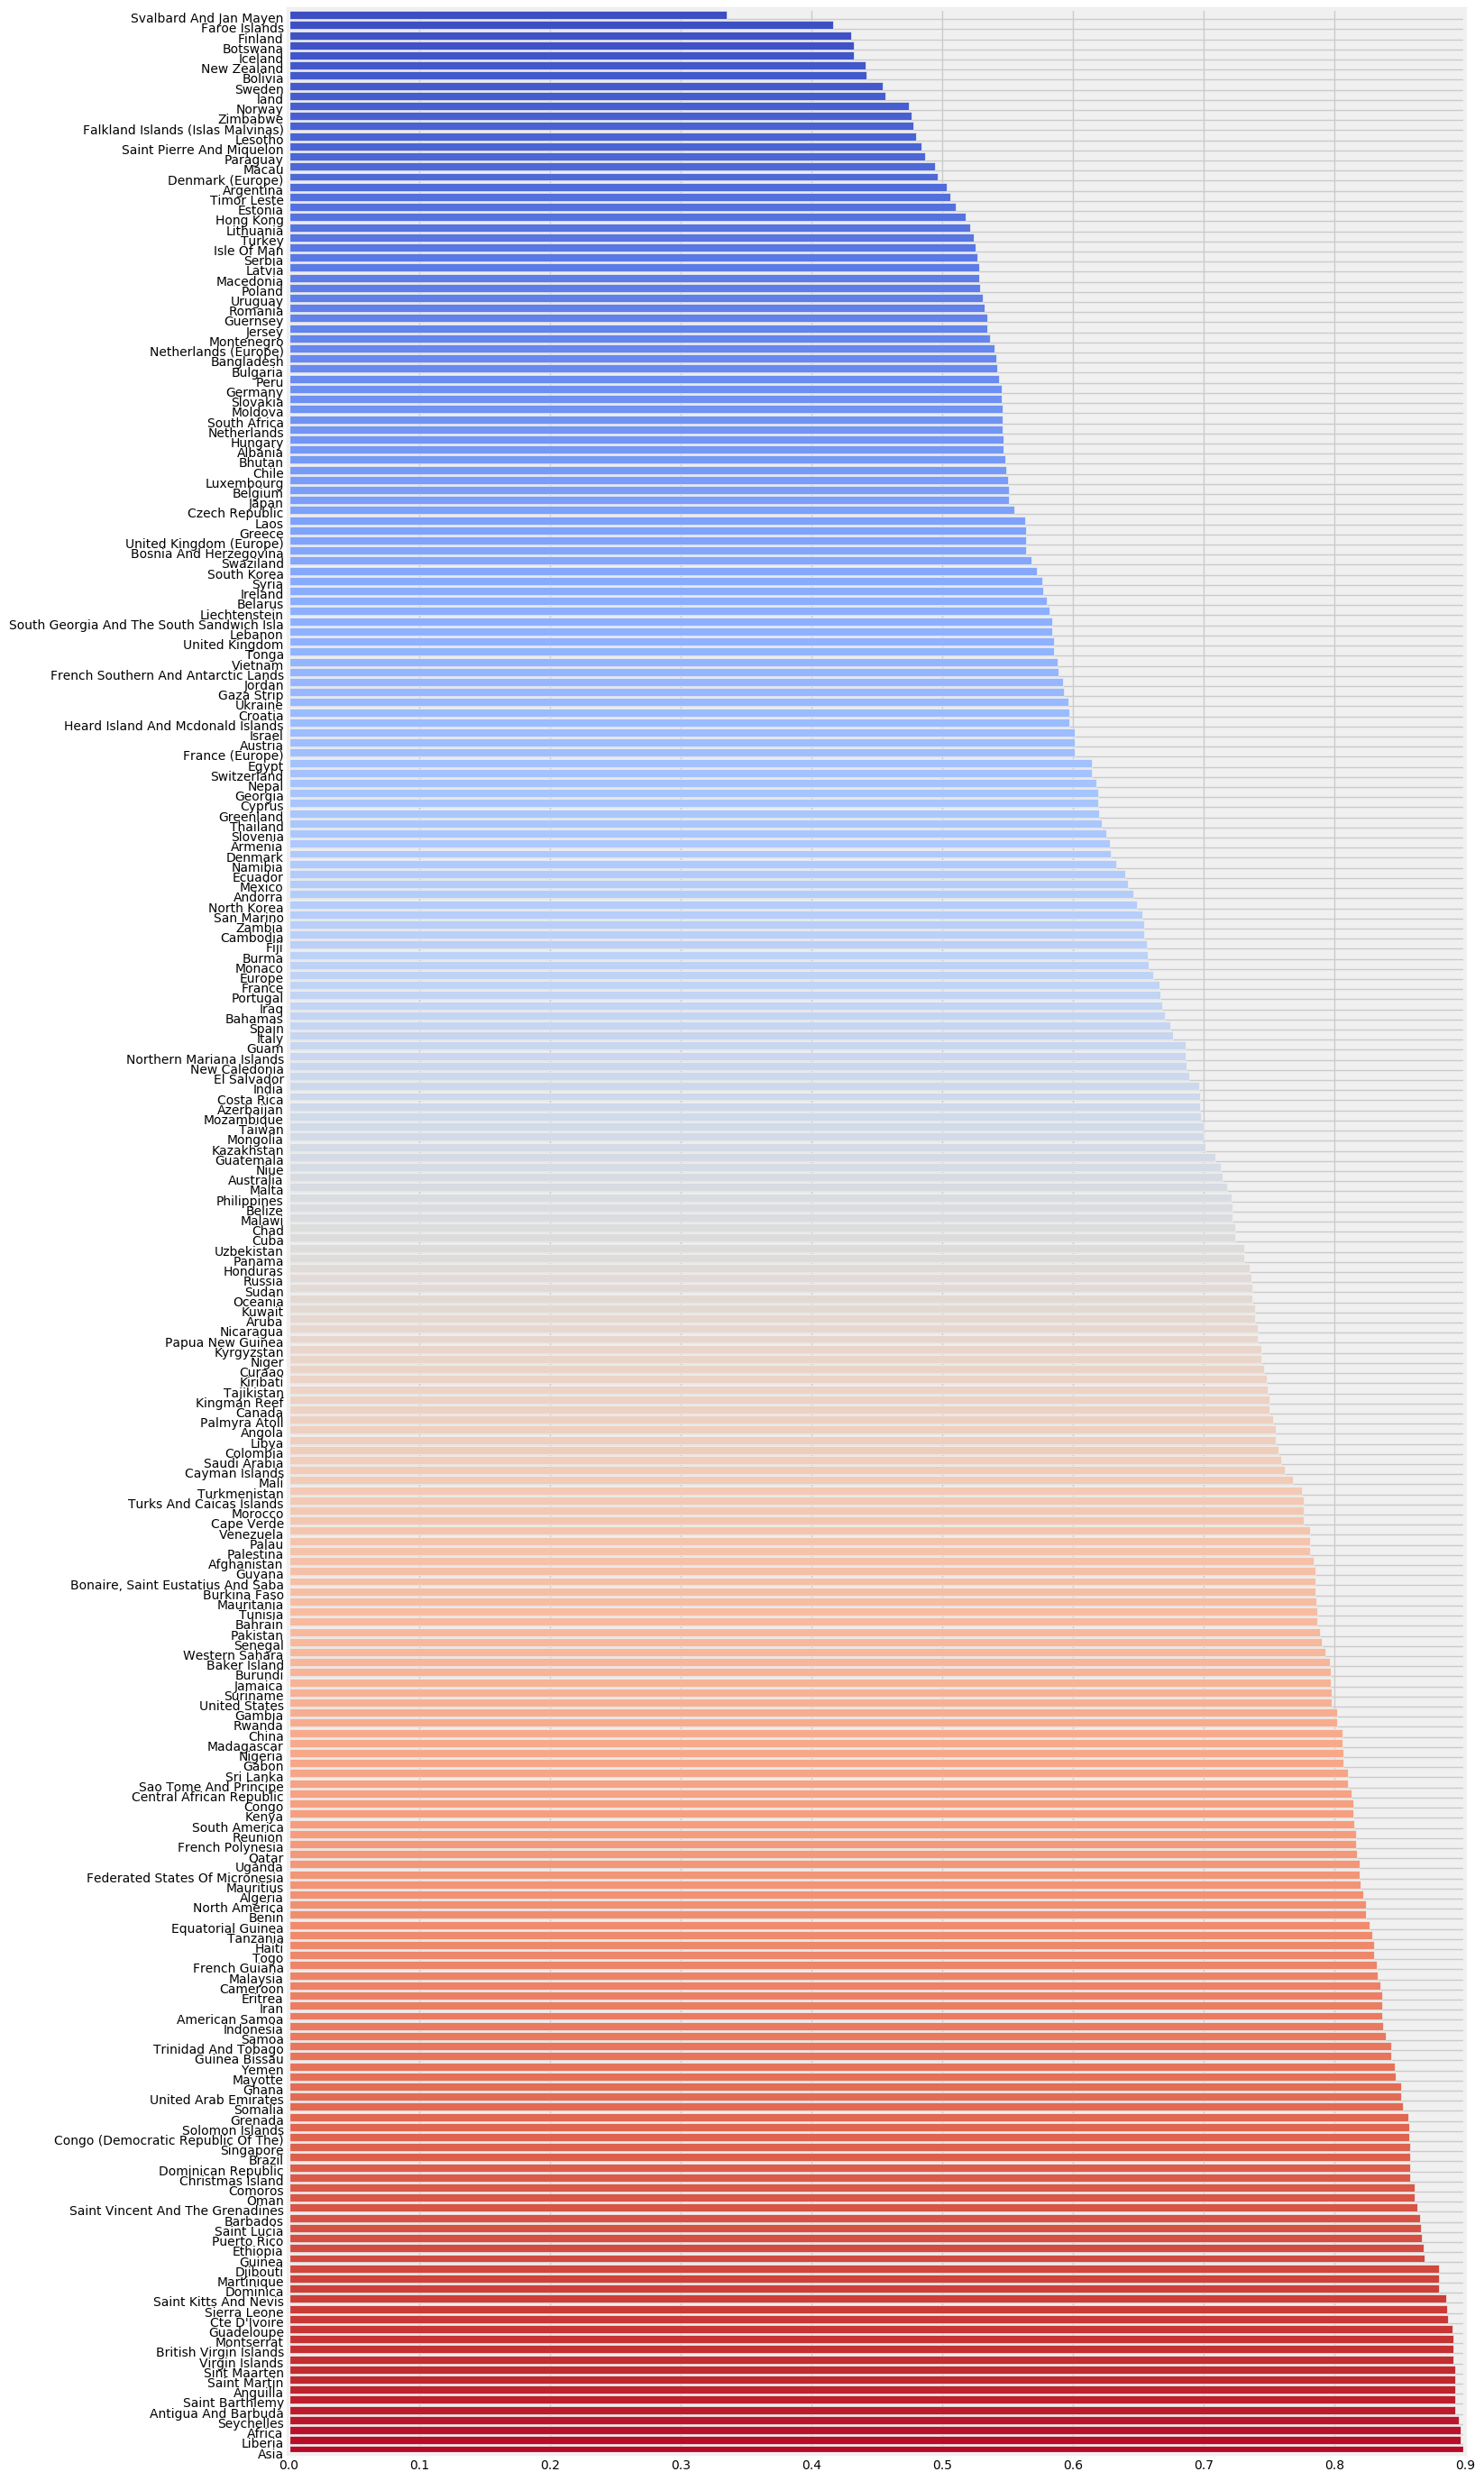

In [20]:
fig = plt.figure (figsize = (15, 35))
plt.barh (range (len (countries)), tmpCorrel, color = sns.color_palette ("coolwarm_r", len (countries)))
plt.ylim (0, len (countries))
plt.yticks (range (len (countries)), newCountries)
plt.show ()